## Statistics

In [18]:
import math
import itertools
import statistics

from itertools import repeat

### Question 1


In [19]:

microstates = (1, 0)


def get_states(N: int) -> None:
    return ''.join(
            f'{bin(i)[2:].zfill(N)} \t {i.bit_count()} \n'
            for i in range(
                int(math.pow(2, N))
            )
        )



In [20]:
print(get_states(4))

0000 	 0 
0001 	 1 
0010 	 1 
0011 	 2 
0100 	 1 
0101 	 2 
0110 	 2 
0111 	 3 
1000 	 1 
1001 	 2 
1010 	 2 
1011 	 3 
1100 	 2 
1101 	 3 
1110 	 3 
1111 	 4 



### Question 2

In [21]:
# 27 de sobra

### Question 3

In [22]:
# Not enough memory to store the results

### Question 4

In [23]:
import matplotlib.pyplot as plt


def n_over_k(n, k):
    return math.comb(n, k)


def plot_for_n(n):

    states = tuple(range(0, n + 1))
    combinations = tuple(n_over_k(n, k) for k in states)

    fig, ax = plt.subplots()

    colors=plt.cm.get_cmap('plasma', 170)
    ax.plot(states, combinations, color=colors(n), label=f'N={n}')

    # ax.set_yscale('log')

    plt.legend()
    plt.show()


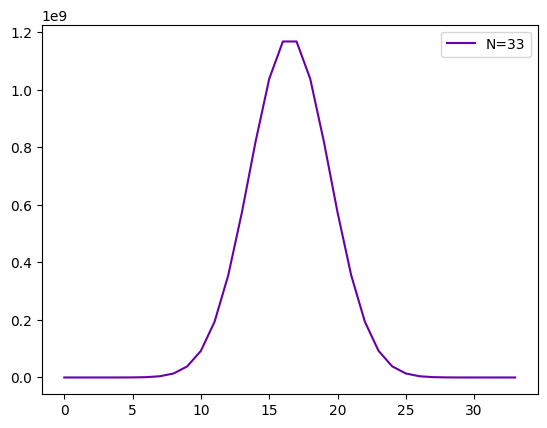

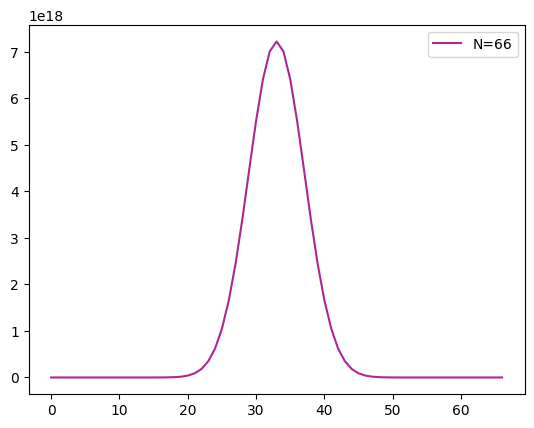

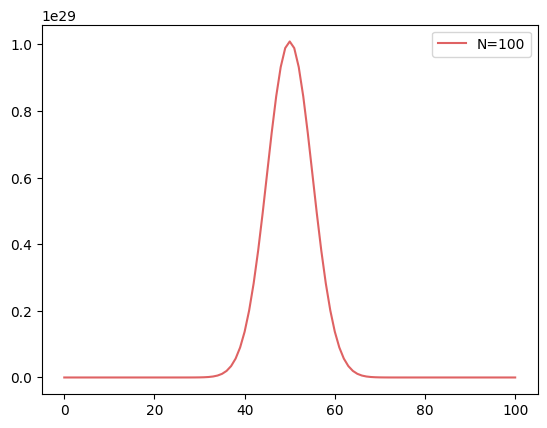

In [24]:

plot_for_n(33)
plot_for_n(66)
plot_for_n(100)

## Question 5

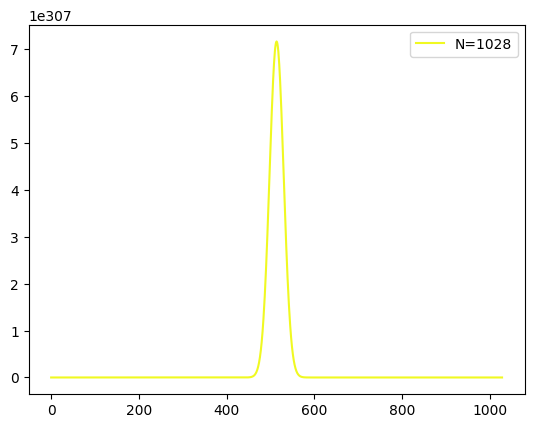

In [25]:
plot_for_n(1028)

OverflowError: int too large to convert to float

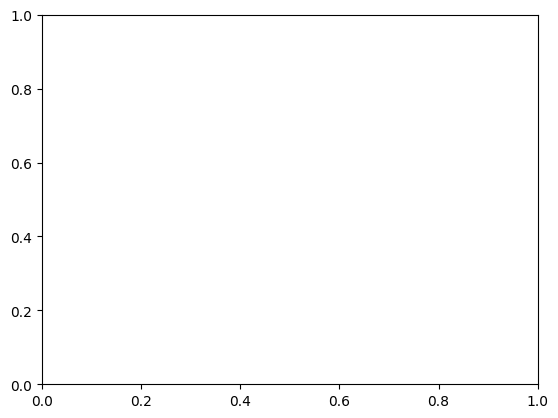

In [26]:
plot_for_n(1030)

# The result of n over k is too large to store it in a float

## Question 6

In [ ]:
# We would get a very (extremely) narrow peak at N/2, with height -> infinity, that is, a dirac delta at N/2.


## Probabilities and Entropy

In [ ]:
nia_alfonso = int('100429848'[-2:])
nia_daniel = int('100452279'[-2:])
nia_alvaro = int('100454417'[-2:])
nia_luis = int('100454766'[-2:])


M = statistics.mean([nia_alfonso, nia_daniel, nia_alvaro, nia_luis])
M = int(M)  # TODO: is this adequate?
N = int(100 + M)


def p_at_point(k, N=N):
    return n_over_k(N, k) / math.pow(2, N)

def p(k: int, N: int = N):
    return sum(map(p_at_point, range(k+1), repeat(N, k+1)))

kb = 1.380649e-23 #m2 kg s-2 K-1

def s(states):
    return kb * math.log(states)


# TODO: Normalize the distributio by dividing by the number of states
# TODO: To get the probability at a point, add the previous probabilities

### Question 1

In [ ]:
p(10)

1.7508317704715777e-32

### Question 2

In [ ]:
hN = int(N/2)

p(hN)

0.4676946852390212

### Question 3

In [ ]:
(p(hN + 5) - p(hN - 5))

0.5810794750935062

### Question 4

In [ ]:
(p(hN + 25) - p(hN - 25))

0.9999544599373413

### Question 5

In [ ]:
states1 = n_over_k(N, hN + 10)
states2 = n_over_k(N, hN)

(abs(s(states1) - s(states2)))

1.8099190638084746e-23

### Question 6

In [ ]:
states1 = n_over_k(N, hN + 5)
states2 = n_over_k(N, hN)
(abs(s(states1) - s(states2)))

4.5150782050146284e-24

### Question 7

In [ ]:
states1 = n_over_k(N, hN)
states2 = n_over_k(N, 2)
(abs(s(states1) - s(states2)))

1.2877448793062366e-21

### Question 8 

In [ ]:
p(2) # Probability per throw

# As there is one throw per second and, to assure get get the 2, we need to get a probability of one:
# 1 = p(2) * Number_of_throws

# So, the time in seconds is 
seconds = int(1/p(2))
days = seconds // (24 * 3600)
years = days // 365.25

print(years, seconds, 1/p(2))

1.1823986985316775e+36 37313665168783265997024505736936072100708352 3.7313665168783266e+43


### Question 9

In [ ]:
p1 = p(hN)
p2 = p(M)

print('Probability of NIA average: ', p2)
print('Probability of half N: ', p1)
print(p1/p2)

Probability of NIA average:  3.0625182231336445e-05
Probability of half N:  0.4676946852390212
15271.572319346542


### Question 11

In [ ]:
# Pues, todo lo que no sea la probabilidad de N/2, es 0. Si los intervalos de probabilidad contienen el punto N/2, la probabilidad es 0.5, si no, es 0.